# Overview

In [1]:
import pandas as pd
from olist_churn_prediction.paths import RAW_DIR # папка с сырыми данными

In [2]:
geolocation_data = pd.read_csv(RAW_DIR / "geolocation_olist_public_dataset.csv")
classified_data = pd.read_csv(RAW_DIR / "olist_classified_public_dataset.csv").drop('Unnamed: 0', axis=1)
public_customers_data = pd.read_csv(RAW_DIR / "olist_public_dataset_v2_customers.csv")
public_data = pd.read_csv(RAW_DIR / "olist_public_dataset_v2.csv")
payments = pd.read_csv(RAW_DIR / "payments_olist_public_dataset.csv")
translation = pd.read_csv(RAW_DIR / "product_category_name_translation.csv")
product_measures = pd.read_csv(RAW_DIR / "product_measures_olist_public_dataset_.csv")
sellers = pd.read_csv(RAW_DIR / "sellers_olist_public_dataset_.csv")

## Формулировка задач проекта на языке бизнеса

Так как все чем я обладаю - это сырые данные, то постановку задачи проекта определяю я сам. Пусть постановка задачи звучит следующим образом: отдел бизнес-аналитики компании 'Olist' посчитал, что отток клиентов стал превышать допустимые значения. Однако неизвестно, по какому принципу определяется факт ухода клиента, так как метка ухода отсутствует. Нужно создать систему предсказания оттока клиентов и представить руководству. Были выделены основные этапы проекта:
1. **Провести EDA, предобработку данных, объединить таблицы в одну**;
2. **Создать интерпретируемую метку ухода клиента**;
3. **Использовать машинное обучение для интерпретации данной метки: какие признаки или комбинации признаков наилучшим образом описывают ушедшего клиента**;
4. **Создать интуитивно понятный, легко масштабируемый сервис для предсказания в реальном времени**.

Сервис будет иметь вид набора скриптов и CLI-команд.

## Схема базы данных

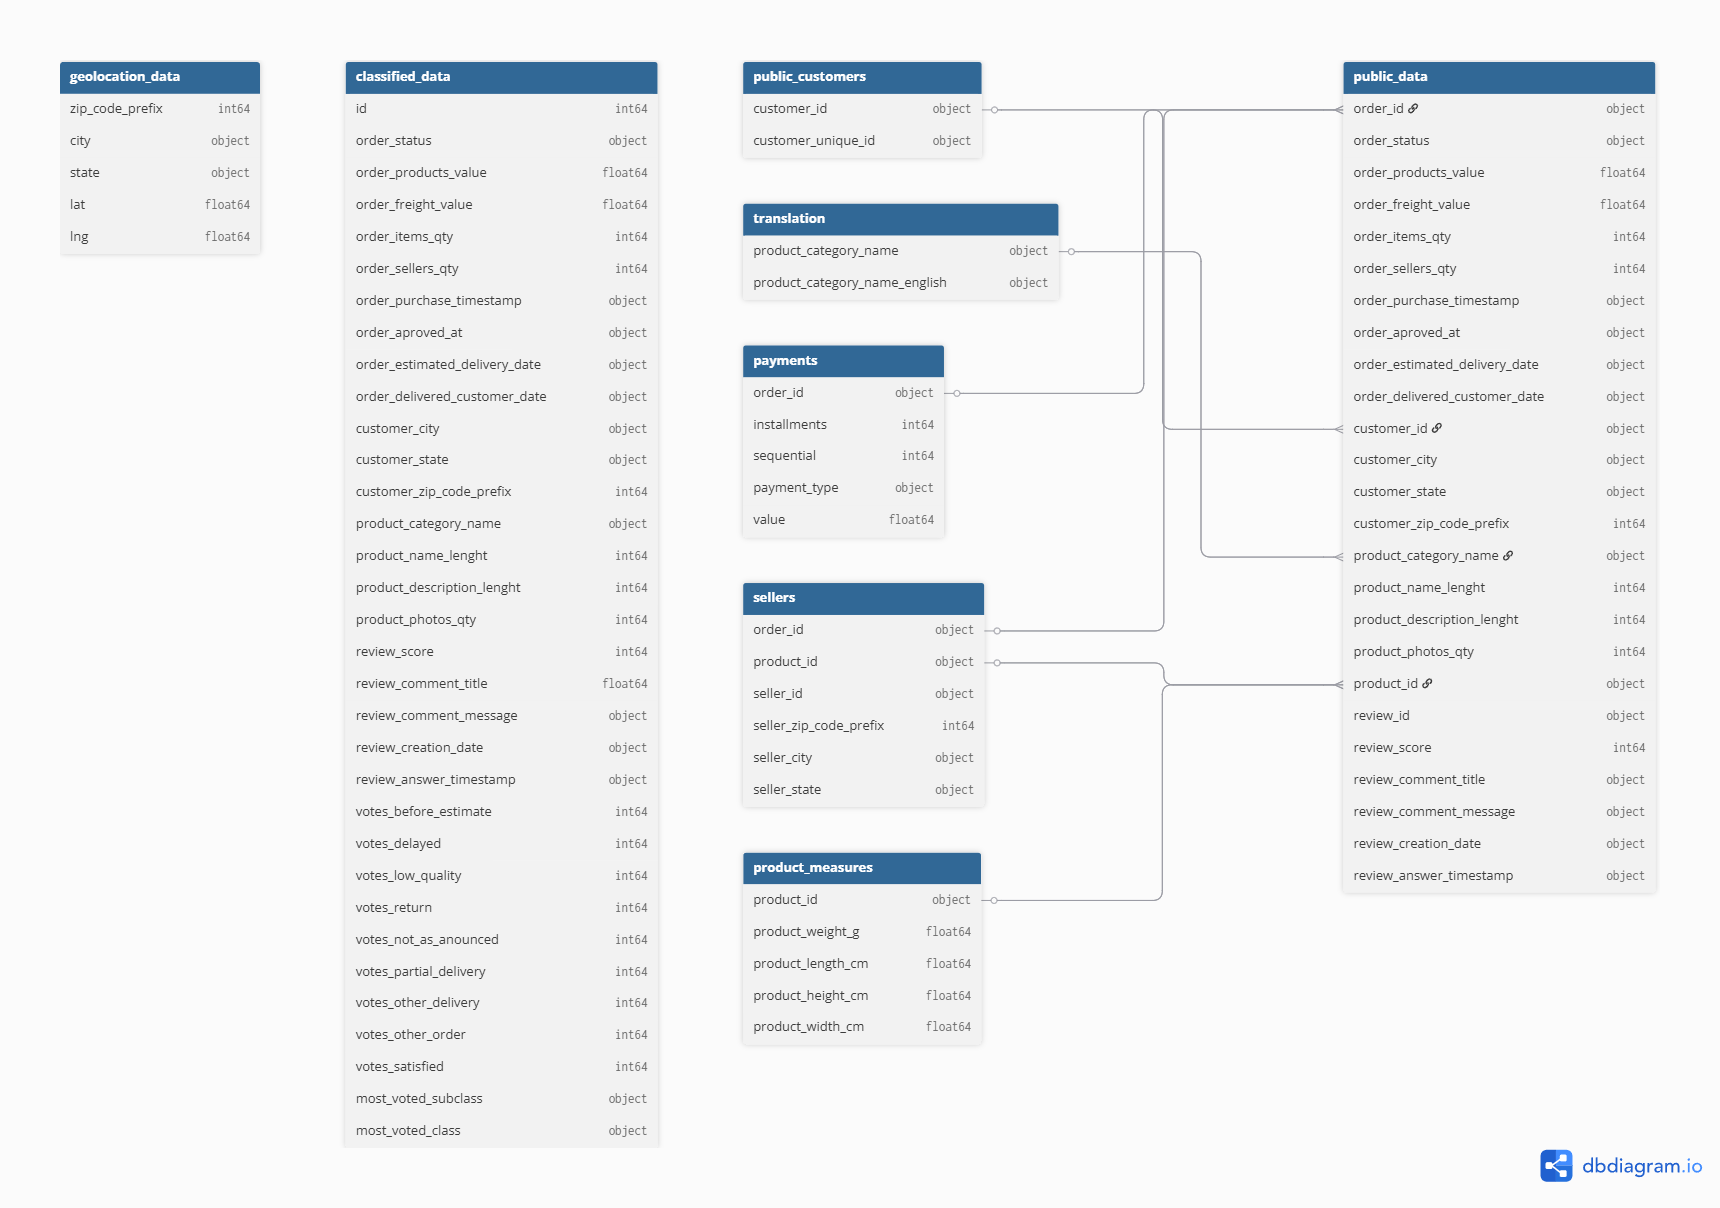

## geolocation_data

In [3]:
display(geolocation_data.head())
print(geolocation_data.shape)
geolocation_data.dtypes

,zip_code_prefix,city,state,lat,lng
0,10,sao paulo,sp,-23.547807,-46.636122
1,10,sao paulo,sp,-23.546081,-46.644820
2,10,sao paulo,sp,-23.540984,-46.642569
3,10,sao paulo,sp,-23.546758,-46.645771
4,10,sao paulo,sp,-23.546362,-46.643073


(323016, 5)


zip_code_prefix      int64
city                object
state               object
lat                float64
lng                float64
dtype: object

## classified_data

In [4]:
display(classified_data.head())
print(classified_data.shape)
classified_data.dtypes

,id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,votes_delayed,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied,most_voted_subclass,most_voted_class
0,1,delivered,89.99,14.38,1,1,2017-08-30 11:41:01.000000,2017-08-30 11:55:08.970352,2017-09-21 00:00:00.000000,2017-09-08 20:35:27.276847,...,0,0,0,0,0,0,0,3,satisfeito,satisfeito_com_pedido
1,2,delivered,69.00,15.23,1,1,2017-09-26 09:13:36.000000,2017-09-26 09:28:10.922048,2017-10-24 00:00:00.000000,2017-09-29 21:13:04.984841,...,0,0,0,0,0,0,0,0,antes_prazo,satisfeito_com_pedido
2,3,delivered,99.80,15.86,2,4,2018-01-15 15:50:42.000000,2018-01-17 07:29:56.419769,2018-02-05 00:00:00.000000,2018-01-23 17:51:31.134866,...,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega
3,4,delivered,87.00,12.74,1,1,2018-02-04 11:16:42.000000,2018-02-06 05:31:50.990164,2018-03-13 00:00:00.000000,2018-02-20 19:38:06.633080,...,3,0,0,0,0,0,0,0,atrasado,problemas_de_entrega
4,5,delivered,99.90,17.95,1,2,2017-12-07 11:58:42.000000,2017-12-08 02:36:49.587515,2018-01-03 00:00:00.000000,2017-12-19 22:33:18.952512,...,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega


(3584, 33)


id                                 int64
order_status                      object
order_products_value             float64
order_freight_value              float64
order_items_qty                    int64
order_sellers_qty                  int64
order_purchase_timestamp          object
order_aproved_at                  object
order_estimated_delivery_date     object
order_delivered_customer_date     object
customer_city                     object
customer_state                    object
customer_zip_code_prefix           int64
product_category_name             object
product_name_lenght                int64
product_description_lenght         int64
product_photos_qty                 int64
review_score                       int64
review_comment_title             float64
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
votes_before_estimate              int64
votes_delayed                      int64
votes_low_qualit

## public_customers

In [5]:
display(public_customers_data.head())
print(public_customers_data.shape)
public_customers_data.dtypes

,customer_id,customer_unique_id
0,0000ca4ff2795842fd6b122c6d974468,ac0e5d7f07043dd32831bdad3b99ad26
1,00010f206878ba01f199aec4237de72e,4ed24aaed4079fe0661c0e4b3b420dff
2,00012a2ce6f8dcda20d059ce98491703,7e0e291c0f4fc2d69208954d26ed0586
3,000161a058600d5901f007fab4c27140,ff1dcb27ea444eddb94ea5fea77b875c
4,00017f1d6cce0d56046219a2cfabcbbb,237130c4b6717031ed62d9d0b16fd94f


(96264, 2)


customer_id           object
customer_unique_id    object
dtype: object

## public_data

In [6]:
display(public_data.head())
print(public_data.shape)
public_data.dtypes

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


(100000, 25)


order_id                          object
order_status                      object
order_products_value             float64
order_freight_value              float64
order_items_qty                    int64
order_sellers_qty                  int64
order_purchase_timestamp          object
order_aproved_at                  object
order_estimated_delivery_date     object
order_delivered_customer_date     object
customer_id                       object
customer_city                     object
customer_state                    object
customer_zip_code_prefix           int64
product_category_name             object
product_name_lenght                int64
product_description_lenght         int64
product_photos_qty                 int64
product_id                        object
review_id                         object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_ti

## payments

In [7]:
display(payments.head())
print(payments.shape)
payments.dtypes

,order_id,installments,sequential,payment_type,value
0,25e8ea4e93396b6fa0d3dd708e76c1bd,1,1,credit_card,65.71
1,ba78997921bbcdc1373bb41e913ab953,8,1,credit_card,107.78
2,42fdf880ba16b47b59251dd489d4441a,2,1,credit_card,128.45
3,771ee386b001f06208a7419e4fc1bbd7,1,1,credit_card,81.16
4,62fe0bd75deb58982ebf8e53a128a301,1,1,credit_card,15.82


(97433, 5)


order_id         object
installments      int64
sequential        int64
payment_type     object
value           float64
dtype: object

## translation

In [8]:
display(translation.head())
print(translation.shape)
translation.dtypes

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


(71, 2)


product_category_name            object
product_category_name_english    object
dtype: object

## product_measures

In [9]:
display(product_measures.head())
print(product_measures.shape)
product_measures.dtypes

,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00faa46f36261af8bbf3a4d37fa4841b,100.0,21.0,9.0,14.0
1,b497d0032ea073dd58bbd2d7809d25b3,750.0,23.0,5.0,15.0
2,96bd76ec8810374ed1b65e291975717f,200.0,16.0,6.0,19.5
3,506110a1603e772a8ff52ea1f0b0431d,200.0,16.0,13.0,13.0
4,feb593f17c2f51af2932dbba3e99f1cb,50.0,35.0,4.0,26.0


(24439, 5)


product_id            object
product_weight_g     float64
product_length_cm    float64
product_height_cm    float64
product_width_cm     float64
dtype: object

## sellers

In [10]:
display(sellers.head())
print(sellers.shape)
sellers.dtypes

,order_id,product_id,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0faabac07131235fc5d9d711471cb4db,40b09f33e646d488df2ca6fec4082d50,3d871de0142ce09b7081e2b9d1733cb1,132,campo limpo paulista,SP
1,970f41d57d6e21afa7b8c701b09acb95,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,371,ilicinea,MG
2,b674ed44cc3f6a869249421debebe104,bd7cd34fc6d02e730221b11edc354aae,46dc3b2cc0980fb8ec44634e21d2718e,222,rio de janeiro,RJ
3,cbe9eae36605cf2bd005c6bc1ae5f864,0e95d6eef2bedaf4ecf3c33f78199059,dc4a0fc896dc34b0d5bfec8438291c80,149,ibitinga,SP
4,f562f8a4adf5a459176f7170d0da220d,9a3a44b7cc16f2592b2110e4205edf97,5a8e7d5003a1f221f9e1d6e411de7c23,130,campinas,SP


(98981, 6)


order_id                  object
product_id                object
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object